# Ejercicios con señales


## Generar funciones
La fórmula matemática que utilizaremos es:

f(t) = A*sin(2 * pi *F * t * $\phi$) 

Donde:
* $A$: Amplitud (la altura de la onda).
* $F$: Frecuencia en Hertz (ciclos por segundo).
* $t$: Tiempo.
* $\phi$: Fase (el punto de inicio).

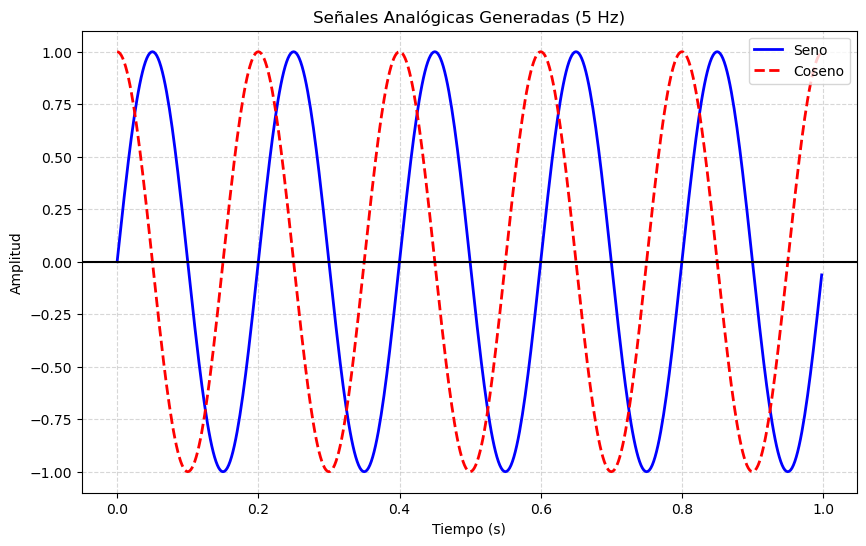

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuración de los parámetros de la señal
frecuencia = 5        # 5 Hz (5 ciclos por segundo)
amplitud = 1          # Amplitud de la onda
frecuencia_muestreo = 500  # Cuántos puntos tomamos por segundo (calidad)
duracion = 1          # Segundos a generar

# 2. Crear el eje de tiempo (de 0 a 'duracion' con 'frecuencia_muestreo' puntos)
t = np.linspace(0, duracion, frecuencia_muestreo, endpoint=False)

# 3. Generar las señales
# La señal coseno es simplemente una señal seno desplazada 90 grados (pi/2)
seno = amplitud * np.sin(2 * np.pi * frecuencia * t)
coseno = amplitud * np.cos(2 * np.pi * frecuencia * t)

# 4. Visualización
plt.figure(figsize=(10, 6))

plt.plot(t, seno, label='Seno', color='blue', linewidth=2)
plt.plot(t, coseno, label='Coseno', color='red', linestyle='--', linewidth=2)

plt.title(f'Señales Analógicas Generadas ({frecuencia} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='k') # Línea central
plt.legend()

plt.show()

## Ruido en señales
Explicación de los componentes del ruido:
* Media (loc=0): El ruido oscila alrededor de cero, por lo que no desplaza la señal hacia arriba o hacia abajo permanentemente.

* Desviación Estándar (scale): Controla qué tan "fuerte" es el ruido. Un valor alto hará que la señal original sea casi irreconocible.

* Naturaleza Aleatoria: Cada vez que ejecutes el código, la forma del ruido cambiará, simulando la naturaleza impredecible de las interferencias reales.

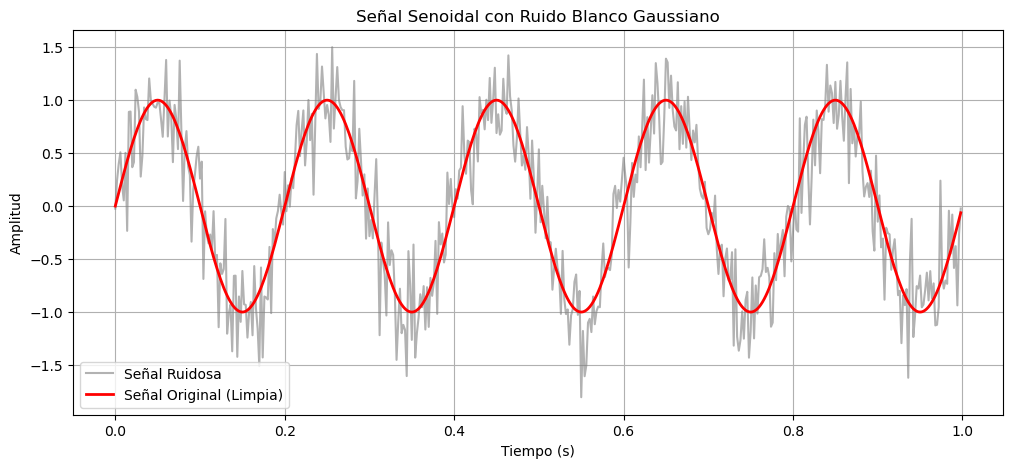

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuración de la señal base
frecuencia = 5
amplitud = 1
fs = 500  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)

# 2. Generar la señal limpia (Seno)
señal_limpia = amplitud * np.sin(2 * np.pi * frecuencia * t)

# 3. Generar el Ruido Blanco Gaussiano
# loc es la media (0), scale es la desviación estándar (intensidad del ruido)
intensidad_ruido = 0.3
ruido = np.random.normal(loc=0, scale=intensidad_ruido, size=t.shape)

# 4. Crear la señal ruidosa (Suma de señal + ruido)
señal_ruidosa = señal_limpia + ruido

# 5. Visualización
plt.figure(figsize=(12, 5))

plt.plot(t, señal_ruidosa, label='Señal Ruidosa', color='gray', alpha=0.6)
plt.plot(t, señal_limpia, label='Señal Original (Limpia)', color='red', linewidth=2)

plt.title('Señal Senoidal con Ruido Blanco Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## suma de señales análogas

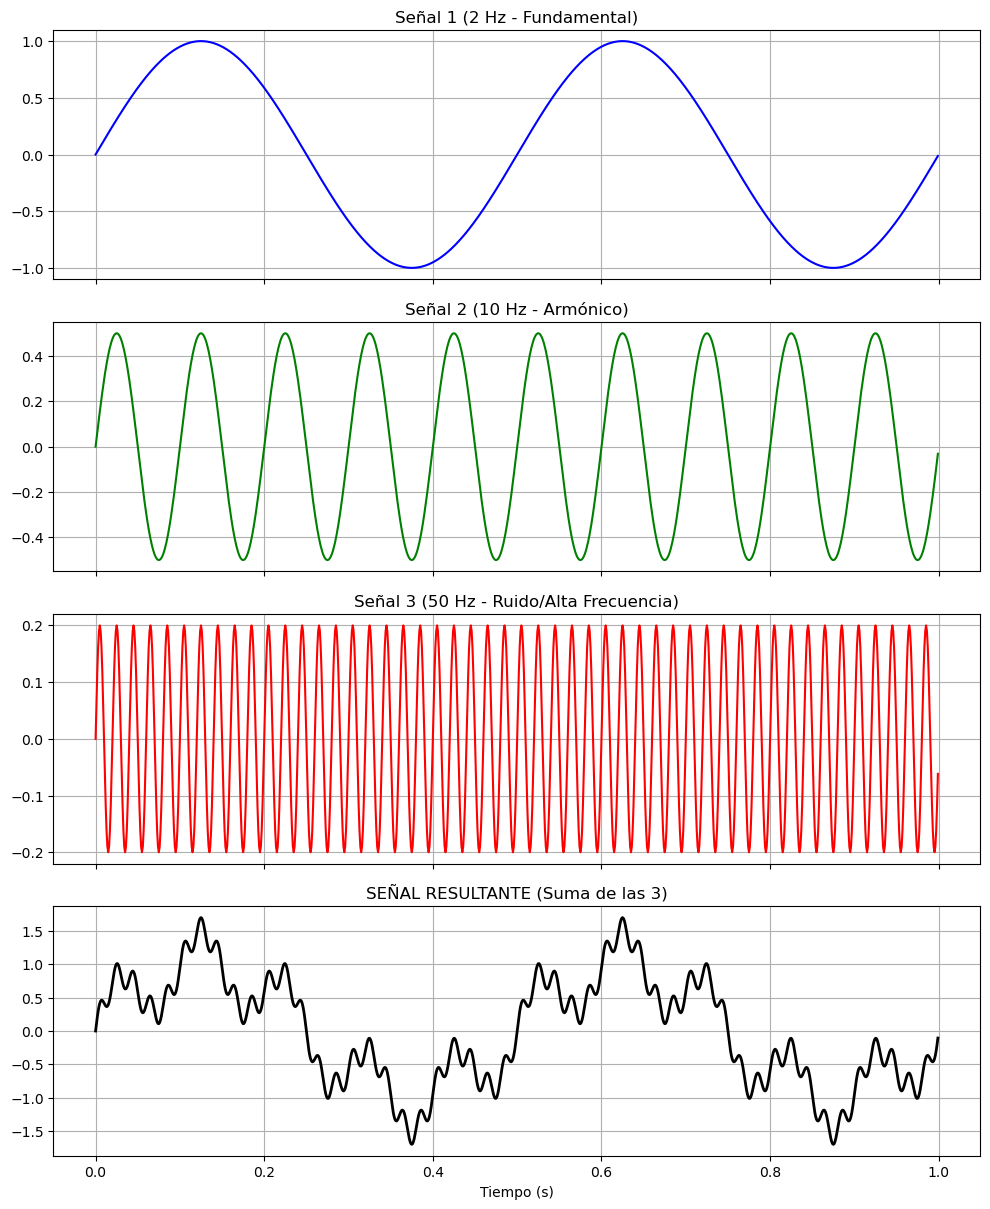

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuración del tiempo
fs = 1000  # Frecuencia de muestreo (1000 puntos por segundo)
t = np.linspace(0, 1, fs, endpoint=False)

# 2. Definir 3 señales con diferentes características
# Señal 1: Frecuencia baja, amplitud alta
s1 = 1.0 * np.sin(2 * np.pi * 2 * t) 

# Señal 2: Frecuencia media, amplitud media
s2 = 0.5 * np.sin(2 * np.pi * 10 * t)

# Señal 3: Frecuencia alta, amplitud baja
s3 = 0.2 * np.sin(2 * np.pi * 50 * t)

# 3. SUMA DE LAS SEÑALES
señal_sumada = s1 + s2 + s3

# 4. Visualización
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(t, s1, color='blue')
axs[0].set_title('Señal 1 (2 Hz - Fundamental)')

axs[1].plot(t, s2, color='green')
axs[1].set_title('Señal 2 (10 Hz - Armónico)')

axs[2].plot(t, s3, color='red')
axs[2].set_title('Señal 3 (50 Hz - Ruido/Alta Frecuencia)')

axs[3].plot(t, señal_sumada, color='black', linewidth=2)
axs[3].set_title('SEÑAL RESULTANTE (Suma de las 3)')

for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.xlabel('Tiempo (s)')
plt.show()

## Señal discreta 

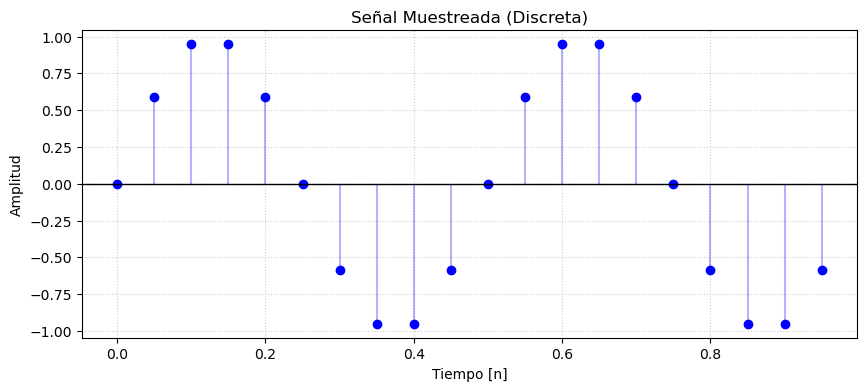

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parámetros
fs = 20  # Frecuencia de muestreo baja para que se noten los puntos
f = 2    # Frecuencia de la señal (2 Hz)
t = np.linspace(0, 1, fs, endpoint=False)

# 2. Generar la señal
señal = np.sin(2 * np.pi * f * t)

# 3. Graficar la señal muestreada
plt.figure(figsize=(10, 4))

# Usamos 'o' para mostrar solo los puntos (muestras) sin líneas que los unan
plt.plot(t, señal, 'o', color='blue') 

# Opcional: Dibujar líneas verticales desde el eje para enfatizar que es discreta
for ti, si in zip(t, señal):
    plt.vlines(ti, 0, si, colors='blue', alpha=0.3)

plt.axhline(0, color='black', linewidth=1)
plt.title('Señal Muestreada (Discreta)')
plt.xlabel('Tiempo [n]')
plt.ylabel('Amplitud')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()